In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import scipy.io as sio
import keras as ks
from sklearn import preprocessing
import random
tf.__version__

Using TensorFlow backend.


'1.12.0'

In [2]:
def loadData(image):

    if image is 1:
        a = sio.loadmat('San_Diego.mat')
    elif image is 2:
        a = sio.loadmat('Airport.mat')
    elif image is 3:
        a = sio.loadmat('Beach.mat')
    elif image is 4:
        a = sio.loadmat('Urban.mat')
    elif image is 5:
        a = sio.loadmat('HYDICE_urban.mat')
    data = a['data']
    labels = a['map']
    return data, labels

def reshape_to_input_format(input_):
    tmp = np.zeros([1,189,1])
    for i in range(input_.shape[0]):
        tmp[0][i][0] = input_[i]
    return tmp

In [3]:
model = ks.models.load_model("m2.h5")

In [ ]:
img, gt = loadData(image=2)
img = np.float64(img)
plt.imshow(gt,cmap='gray')
data = []
lable = []

res = np.zeros([100,100])

for y in range(2,98):
    for x in range(2,98):
        p = img[y][x][:189]
        g = gt[y][x]

        t1 = img[y-1][x-1][:189]
        t2 = img[y-1][x][:189]
        t3 = img[y-1][x+1][:189]
        t4 = img[y][x+1][:189]
        t5 = img[y+1][x+1][:189]
        t6 = img[y+1][x][:189]
        t7 = img[y+1][x-1][:189]
        t8 = img[y][x-1][:189]
        
        data = []
        data.append(reshape_to_input_format(np.abs(p-t1)))
        data.append(reshape_to_input_format(np.abs(p-t2)))
        data.append(reshape_to_input_format(np.abs(p-t3)))
        data.append(reshape_to_input_format(np.abs(p-t4)))
        data.append(reshape_to_input_format(np.abs(p-t5)))
        data.append(reshape_to_input_format(np.abs(p-t6)))
        data.append(reshape_to_input_format(np.abs(p-t7)))
        data.append(reshape_to_input_format(np.abs(p-t8)))
        
        data = np.asarray(data)
        r = model.predict(data)
        sum = 0
        for i in range(len(r)):
            sum += r[i]
        
        d = sum/len(r)
        if d > 0.55:
            res[y][x] = 1


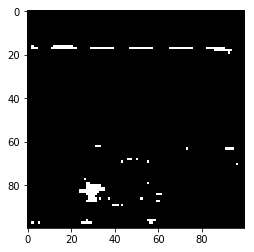

In [18]:
plt.imshow(res,cmap='gray')

In [13]:
data_ones = []
lable_ones = []

data_zero = []
lable_zero = []

for i in range(len(data)):
    if lable[i]==1:
        data_ones.append(data[i])
        lable_ones.append(1)


for i in range(len(data)):
    if lable[i]==0:
        data_zero.append(data[i])
        lable_ones.append(0)

print(len(data_ones))
data_ones = data_ones[:210]
data_zero = data_zero[:210]  
test_data = []
test_lable = []
for i in range(420):
    if i%2==0:
        test_data.append(data_ones.pop())
        test_lable.append(1)
    else:
        test_data.append(data_zero.pop())
        test_lable.append(0)
print(len(test_data))

212
420


In [14]:
test_data = np.asarray(test_data)
test_lable = np.asarray(test_lable)

score = model.evaluate(test_data, test_lable,verbose=1)

print(score)

420/420 [==============================] - 0s 971us/step
[0.294985977347408, 0.8476190476190476]
